# Okwuazu Ifeakachukwu 
# 
# Airbnb listings data analysis


---

# Pre-processing and exploratory analysis


In [1]:
#Importing libraries
import os 
import scipy
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf




In [2]:
df=pd.read_csv('C:\\Users\\c2074370\\listings.csv')



***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


In [3]:
#displaying dataframe 
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


In [4]:
def drop_cols(df):
  """Takes dataframe(df) as input and returns a reduced dataset after dropping the 
     variables in the list(var)"""
  
  var=['scrape_id','last_scraped','description','listing_url','neighbourhood',
       'calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url',
       'host_url', 'host_about','host_location','host_total_listings_count',
       'host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text',
       'has_availability','minimum_minimum_nights','maximum_minimum_nights',
       'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']
  df=df.drop([x for x in var if x in df.columns], axis=1)  
  return df

In [5]:
#call to function 
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [6]:
def drop_cols_na(df, threshold):
  """Recieves dataframe(df) and threshold as arguements and drops columns based on the threshold percentage of NANs"""
  threshold= len(df) * 0.5 #specifying threshold percentage 
  df=df.dropna(axis=1, thresh=threshold)  #dropping columns with 50% NANs
  return df

In [7]:
#calling the function
df = drop_cols_na(df,0.5)
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,t,Indische Buurt,1.0,t,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,t,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,f,Grachtengordel,2.0,t,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,t,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,t,Grachtengordel,2.0,t,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,t,Westelijke Eilanden,1.0,t,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,t,Amsterdam Centrum,2.0,t,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,f,NaN,0.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,f,NaN,2.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,f,NaN,2.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,f,NaN,1.0,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [8]:
def binary_encoding(df):
  """Encodes all columns with binary notation t and f"""
  for columns in df:
    df.replace({'f': 0,'t': 1}, inplace=True) # encoding binary variables 
  return df

In [9]:
df = binary_encoding(df)
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,2020-07-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,2020-09-20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
def add_host_days(df):
  """Creates a new column which represents the number of days the host has 
  been registered"""
  df.host_since = pd.to_datetime(df.host_since) 
  df['host_days'] = (pd.to_datetime('today') - df.host_since).astype('timedelta64[D]')#creatng host_days column
  return df

In [11]:
def convert_price(df):
  """Takes dataframe as input and converts the type of the price variable from string to float"""
  
  df['price'] = df['price'].str.replace('$', '')#replace dollar sign 
  df['price'] = df['price'].str.replace(',', '')#replacing commas in the prices 
  df[['price']] = df[['price']].astype('float')#converting price to type float 
  return df

In [12]:
#calling both functions 
df = add_host_days(df)
df = convert_price(df)
df

,id,name,host_id,host_name,host_since,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,100%,1.0,Indische Buurt,1.0,1.0,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4637.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,100%,0.0,Grachtengordel,2.0,1.0,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4203.0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,57%,1.0,Grachtengordel,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4215.0
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,100%,1.0,Westelijke Eilanden,1.0,1.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4092.0
4,28871,Comfortable double room,124245,Edwin,2010-05-13,92%,1.0,Amsterdam Centrum,2.0,1.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,46938808,NiceAmsterdam,379294518,Elizabeth,2020-12-10,NaN,0.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,177.0
18518,46940774,Fantastic Apartment with beautiful views,279181956,Ramon,2019-07-25,NaN,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,681.0
18519,46944602,cozy apartment in amsterdam,375398295,Danila,2020-11-12,100%,0.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,205.0
18520,46953753,Great luxurious apartment in city centre,379498141,Lisa,2020-12-11,NaN,0.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,176.0


# Basic queries of listings 

In [13]:
# Number of hosts who offer 2 or more properties for rent?
host_properties_count= df[df['host_listings_count'] >= 2.0].groupby('host_id').count()
host_properties_count.shape[0]

2077

In [14]:
# The highest price for a listing?
df['price'].max()

8000.0

In [15]:
# The ID of the listing that has the largest number of bedrooms?
df.iloc[df['bedrooms'].idxmax()]['id']

46015289

In [16]:
# The ID of the listing with the largest advertised price?
df.iloc[df['price'].idxmax()]['id']

258273

In [17]:
# The number of listings for the most common room type?
common_room_type=df['room_type'].value_counts().idxmax()
df_common_room_type= df[df['room_type'] ==common_room_type]
df_common_room_type.shape[0]

14433

In [18]:
# Number of hosts registered for more than 3000 days?
host_reg_properties= df[df['host_days'] > 3000.0]
host_reg_properties.shape[0]

2803

## Exploratory analyses

barplot of the average nightly price per neighbourhood

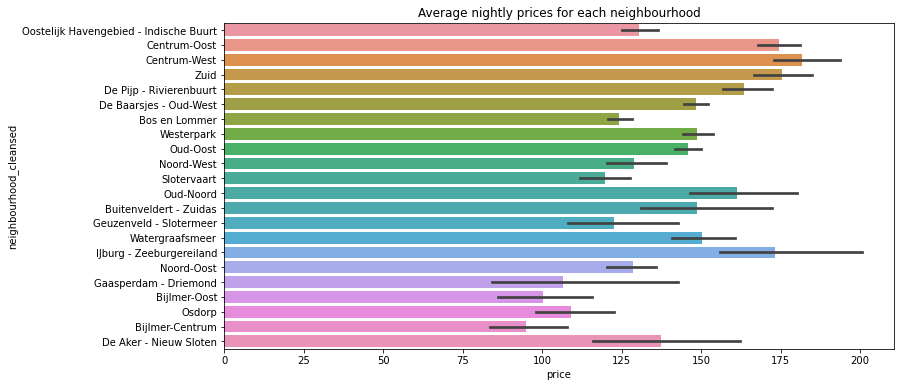

In [19]:
#barplot of the average nightly price per neighbourhood 
plt.figure(figsize=(12,6)) #specifying figure size 
ax=sns.barplot(x="price",y="neighbourhood_cleansed",data=df)#specifying variables on x and y axes and dataframe
plt.title("Average nightly prices for each neighbourhood");

correlation matrix of overall reviews ratings and its subitems 

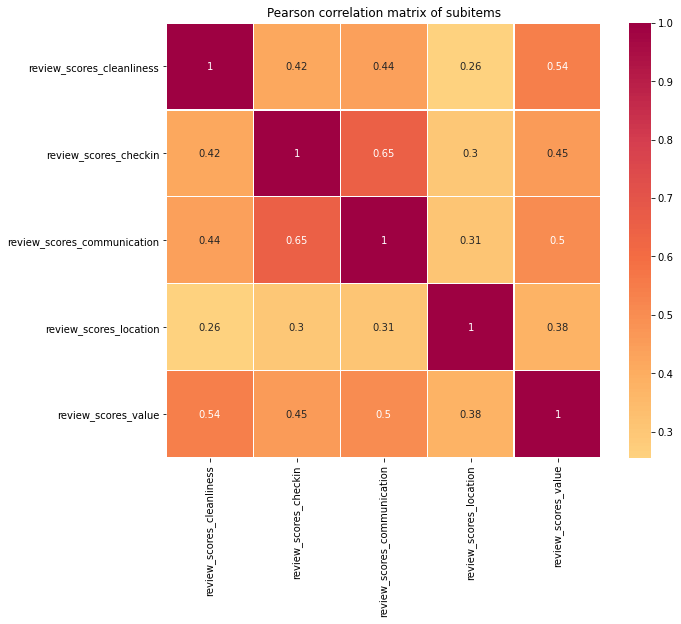

In [20]:
#Pair-wise Pearson correllation matrix between unique values of review_ratings variable 
fig,ax=plt.subplots(figsize=(10,8)) #specifying figure size 
C = df.loc[:,'review_scores_cleanliness':'review_scores_value'].corr() # correlation between unique values in review ratings 
sns.heatmap(C, square=True,annot=True,linewidths=0.5,center=0,cmap='Spectral_r');
ax.set_title('Pearson correlation matrix of subitems');

Geographical distribution of nighlty prices for expensive listings 


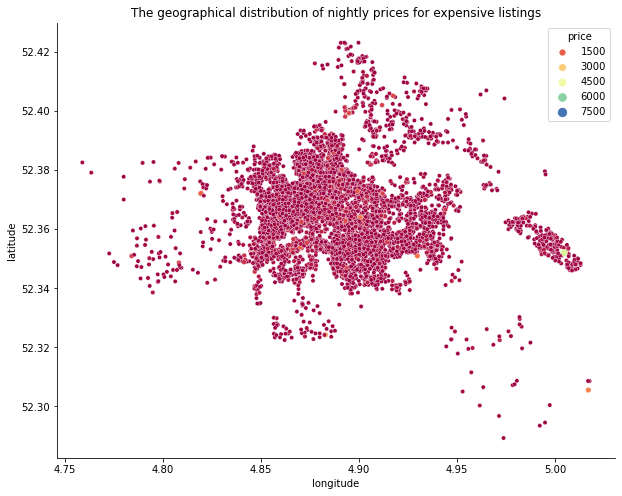

In [21]:
# scatter plot of the geographical distribution of nightly prices for expensive listings
high_price= df[df['price'] > 150]                  #selecting listings greater than $150
plt.figure(figsize=(10,8))                         #specyfing plot size
ax=sns.scatterplot(data=high_price, x="longitude", #providing x and y coordinates and encoding the size and color using price variable 
                   y="latitude",hue="price", 
                   size="price",palette='Spectral') 
ax.set_title('The geographical distribution of nightly prices for expensive listings')
sns.despine();

---

# Statistical analysis and recommender system

## Linear regression and t-tests


In [42]:
#Linear regression to investigate the predictability of overall review rating from it's subitems 
df = df.rename(columns = {'review_scores_accuracy': 'accuracy', 'review_scores_cleanliness': 'cleanliness','review_scores_checkin'
                         :'checkin','review_scores_communication':'communication','review_scores_location': 'location',
                         'review_scores_value': 'value'}, inplace = False) #renaming columns for better readability 
fit = sm.OLS.from_formula('review_scores_rating ~ accuracy +cleanliness + checkin +communication + location + value', df).fit()
print(fit.summary()) #renaming columns to enhance readability 


                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.726
Model:                              OLS   Adj. R-squared:                  0.726
Method:                   Least Squares   F-statistic:                     7008.
Date:                  Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                          13:26:45   Log-Likelihood:                -42957.
No. Observations:                 15880   AIC:                         8.593e+04
Df Residuals:                     15873   BIC:                         8.598e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3169  

Linear regression question

From the summary we observe that the sub-items(independent variables) account for 0.726(72.6%) of the variation in the overall rating, 
and their pvalues are all significant(< 0.05),so the overall rating can be predicted from the subitems,we therefore reject the null hypothesis.

**T-test questions**:

Which room types are significantly different in terms of nightly price?

**Answer**:

Private room vs Entire home/apt ,Private room vs Hotel room ,Entire home/apt vs Hotel room & Entire home/apt vs Shared room.




Bonferroni correction to the alpha level to compensate for any bias 

**Answer**:

After performing Bonferroni correction, the significance changed and only the following roomtypes were significant:

Private room vs Entire home/apt & Private room vs Hotel room.




In [23]:
#Extracting prices of different the room types 
df1 = df[df['room_type']=='Private room']['price'].dropna()
df2 = df[df['room_type']=='Entire home/apt']['price'].dropna()
df3 = df[df['room_type']=='Hotel room']['price'].dropna()
df4 = df[df['room_type']=='Shared room']['price'].dropna()

In [24]:
# multiple ttests of room_type pairs to investigate significance in price difference 

alpha=0.01  #significance level

res_1 = scipy.stats.ttest_ind(df1, df2)
if res_1.pvalue < alpha:
  print('Private room vs Entire home/apt p-value: {:.10f}'.format(ttest_ind(df1, df2).pvalue))
res_2= scipy.stats.ttest_ind(df1, df3)
if res_2.pvalue < alpha:
  print('Private room vs Hotel room p-value: {:.10f}'.format(ttest_ind(df1, df3).pvalue))
res_3= scipy.stats.ttest_ind(df1, df4)
if res_3.pvalue < alpha:
  print('Private room vs Shared room: {:.10f}'.format(ttest_ind(df1, df4).pvalue))
res_4= scipy.stats.ttest_ind(df2, df3)
if res_4.pvalue < alpha:
  print('Entire home/apt vs Hotel room p-value: {:.10f}'.format(ttest_ind(df2, df3).pvalue))
res_5= scipy.stats.ttest_ind(df2, df4)
if res_5.pvalue < alpha:
  print('Entire home/apt vs Shared room p-value: {:.10f}'.format(ttest_ind(df2, df4).pvalue))
res_6= scipy.stats.ttest_ind(df3, df4)
if res_6.pvalue < alpha:
  print('Hotel room  vs Shared room p-value: {:.10f}'.format(ttest_ind(df3, df4).pvalue))


Private room vs Entire home/apt p-value: 0.0000000000
Private room vs Hotel room p-value: 0.0000596655
Entire home/apt vs Hotel room p-value: 0.0029292209
Entire home/apt vs Shared room p-value: 0.0021768319


In [25]:
#Bonferroni correction to compensate for any bias as a result of multiple hypothesis testing 

alpha=0.01   # initial significance level 
no_test= 6   # number of hypothesis 
Threshold=alpha/no_test     # new significance level 


res_1 = scipy.stats.ttest_ind(df1, df2)
if res_1.pvalue < Threshold:
  print('Private room vs Entire home/apt p-value: {:.10f}'.format(ttest_ind(df1, df2).pvalue))
res_2= scipy.stats.ttest_ind(df1, df3)
if res_2.pvalue < Threshold:
  print('Private room vs Hotel room p-value: {:.10f}'.format(ttest_ind(df1, df3).pvalue))
res_3= scipy.stats.ttest_ind(df1, df4)
if res_3.pvalue < Threshold:
  print('Private room vs Shared room: {:.10f}'.format(ttest_ind(df1, df4).pvalue))
res_4= scipy.stats.ttest_ind(df2, df3)
if res_4.pvalue < Threshold:
  print('Entire home/apt vs Hotel room p-value: {:.10f}'.format(ttest_ind(df2, df3).pvalue))
res_5= scipy.stats.ttest_ind(df2, df4)
if res_5.pvalue < Threshold:
  print('Entire home/apt vs Shared room p-value: {:.10f}'.format(ttest_ind(df2, df4).pvalue))
res_6= scipy.stats.ttest_ind(df3, df4)
if res_6.pvalue < Threshold:
  print('Hotel room  vs Shared room p-value: {:.10f}'.format(ttest_ind(df3, df4).pvalue))

Private room vs Entire home/apt p-value: 0.0000000000
Private room vs Hotel room p-value: 0.0000596655


In [26]:
#Creating dataframe of p-vlaues for each pairwise combination 
pd.DataFrame({'Private room':[1,res_1[1],res_2[1],res_3[1]],
              'Entire home/apt':[res_1[1],1,res_4[1],res_5[1]],
              'Hotel room':[res_2[1],res_4[1],1,res_6[1]],
              'Shared room':[res_3[1],res_5[1],res_6[1],1]},
             index=['Private room','Entire home/apt', 'Hotel room', 'Shared room'])

,Private room,Entire home/apt,Hotel room,Shared room
Private room,1.000000e+00,3.624982e-184,0.000060,0.451693
Entire home/apt,3.624982e-184,1.000000e+00,0.002929,0.002177
Hotel room,5.966552e-05,2.929221e-03,1.000000,0.312119
Shared room,4.516929e-01,2.176832e-03,0.312119,1.000000


## Linear regression with variable selection

Numeric variables apart id & name related ones were initally chosen,overall_rating represents all review-related variables & availability_90 represents all availability measures to reduce multi-collinearity.implemented a function to drop correlated variables based on a threshold value.categrocial variables(apart from room_type)have not been chosen,because they will greatly increase dimensionality if encoded.

In [27]:
## creating a data frame of initially selected variables 
new_df=df[['host_is_superhost','host_listings_count','host_has_profile_pic','host_identity_verified',
           'latitude','longitude','accommodates','bedrooms','price','minimum_nights',
           'maximum_nights','availability_90','review_scores_rating','instant_bookable',
           'host_days','room_type']]

In [28]:
def variable_correlation(new_df, threshold):
    """Takes the dataframe(new_df) of initially selected variables and deletes highly corellated 
       variables based on specified threshold"""
    col_del = set()                                         # Set of all the names of deleted variables
    corr = new_df.corr()                              # Getting the corellation between variable pairs 
    for i in range(len(corr.columns)):                # Iterating over the columns in the dataframe 
        for j in range(i):
            if (corr.iloc[i, j] >= threshold) and (corr.columns[j] not in col_del): #retrieving  columns with correllation greater than threshold
                col = corr.columns[i]             # getting the name of column
                col_del.add(col)
                if col in new_df.columns:
                    del new_df[col]                      # deleting the column from the dataframe 
    
    return new_df
    print(new_df.head())

In [29]:
#calling the function 
variable_correlation(new_df,0.5) #returns variables with less than threshold(0.5)corellation with each other 

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,availability_90,review_scores_rating,instant_bookable,host_days,room_type
0,1.0,1.0,1.0,1.0,52.36575,4.94142,2,59.0,3,1125,62,98.0,1,4637.0,Private room
1,0.0,2.0,1.0,1.0,52.36509,4.89354,2,236.0,1,365,3,89.0,1,4203.0,Private room
2,1.0,2.0,1.0,0.0,52.37297,4.88339,3,125.0,14,180,7,100.0,0,4215.0,Entire home/apt
3,1.0,1.0,1.0,1.0,52.38761,4.89188,2,135.0,2,730,84,99.0,1,4092.0,Private room
4,1.0,2.0,1.0,1.0,52.36610,4.88953,2,75.0,2,1825,88,97.0,0,4041.0,Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18517,0.0,0.0,1.0,0.0,52.36978,4.91443,6,330.0,3,1125,87,NaN,1,177.0,Entire home/apt
18518,0.0,2.0,1.0,0.0,52.36404,4.87967,8,350.0,4,23,21,NaN,1,681.0,Entire home/apt
18519,0.0,2.0,1.0,1.0,52.34071,4.90854,4,60.0,28,1125,71,NaN,1,205.0,Entire home/apt
18520,0.0,1.0,1.0,1.0,52.36003,4.89317,3,67.0,2,1125,89,NaN,0,176.0,Private room


In [30]:
#final selection of variables based on corellation
print(new_df.columns)

Index(['host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'price', 'minimum_nights', 'maximum_nights', 'availability_90',
       'review_scores_rating', 'instant_bookable', 'host_days', 'room_type'],
      dtype='object')


In [31]:
##encoding categorical variable
dummies=pd.get_dummies(new_df.room_type).rename(columns=lambda x: 'room_' + x.split()[0])
new_df= pd.concat([new_df, dummies], axis='columns')
new_df=new_df.drop(['room_type','room_Shared'],axis='columns')#dropping room type column and one of the subitems(room_Shared) to prevent duplication 
new_df.head()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,price,minimum_nights,maximum_nights,availability_90,review_scores_rating,instant_bookable,host_days,room_Entire,room_Hotel,room_Private
0,1.0,1.0,1.0,1.0,52.36575,4.94142,2,59.0,3,1125,62,98.0,1,4637.0,0,0,1
1,0.0,2.0,1.0,1.0,52.36509,4.89354,2,236.0,1,365,3,89.0,1,4203.0,0,0,1
2,1.0,2.0,1.0,0.0,52.37297,4.88339,3,125.0,14,180,7,100.0,0,4215.0,1,0,0
3,1.0,1.0,1.0,1.0,52.38761,4.89188,2,135.0,2,730,84,99.0,1,4092.0,0,0,1
4,1.0,2.0,1.0,1.0,52.36610,4.88953,2,75.0,2,1825,88,97.0,0,4041.0,0,0,1


# variable selection by forward selection 

In [32]:
def r_squared_bestmodel(data, selected, response):
    """Args:
         data: dataframe of selected variables 
         selected: List of selected variables 
         response:price(target) variables 
     Returns:
          The best variables based on adjusted rsquared values by forward selection 
    """

    variables = set(data.columns)   
    variables.remove(response)
    
    Initial_score, new_score = 0.0, 0.0                  
    while variables and Initial_score == new_score:   #selects best rsquared by multiple combinations of columns
        result_best_items = []
        for item in variables:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [item]))  #forming the regression formula string 
            result = smf.ols(formula, data).fit().rsquared_adj                   #filtering linear regression model by rsquared_adj
            result_best_items.append((result, item))
        result_best_items.sort()
        new_score, best_var = result_best_items.pop() 
        if Initial_score < new_score:                                  #getting variables that lead to increase in rsquared_adj
            variables.remove(best_var)
            selected.append(best_var)                                  #storing needed variables in a list 
            Initial_score = new_score                                   
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))          #fitting final regression model with variables of best rsquared_adj
    model = smf.ols(formula, data).fit()                          
    print(model.summary())
    return selected

#  Variable selection by backward elimination 

In [33]:
def get_bestModel_pvalue(selected):
    """Args:
           selected: list of variables returned from the previous function
     Returns:
           A sparse list after removing insignificant variables based on pvalues by backward elimination 
    """
   
    selected.remove('room_Private')   # removing room_Private which has pvalue>0.05 from the previous model

    Primary_item=[]
    for curr_var in selected:
        pval_formula = "{} ~ {}".format('price',
                                            ' + '.join(Primary_item + [curr_var]))
        Primary_item.append(curr_var)
    print(pval_formula)

    P2 = smf.ols(pval_formula, new_df).fit()
    print("summary after removing room_Private /n",P2.summary())
    print("-----------------------------------------------")


    selected.remove('longitude')                            #removing longitude which has pvalue>0.05
    Primary_item=[]
    for curr_var in selected:
        pval_formula = "{} ~ {}".format('price',
                                            ' + '.join(Primary_item + [curr_var]))
        Primary_item.append(curr_var)
    print(pval_formula)
    P3 = smf.ols(pval_formula, new_df).fit()
    print("summary after removing longitude /n",P3.summary())
    print("-----------------------------------------------")


    selected.remove('host_days')    #removing host_days which has pvalue>0.05          
    Primary_item=[]
    for curr_var in selected:
        pval_formula = "{} ~ {}".format('price',
                                            ' + '.join(Primary_item + [curr_var]))
        Primary_item.append(curr_var)
    print(pval_formula)
    P4 = smf.ols(pval_formula, new_df).fit()
    print("summary after removing host_is_days /n",P4.summary())
    print("-----------------------------------------------") 
    return selected

In [34]:
##function to calculate the adjusted rsquared and pvalue using each variable and select the best variables
def variable_selection(data,selected,target,alpha):
  model1=r_squared_bestmodel(data,selected,target)
  selected=get_bestModel_pvalue(selected)
  return selected

In [35]:
##function(variable_selection) call to test
selected = []
pred=variable_selection(new_df,selected,target='price',alpha=0.05)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     304.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:23:44   Log-Likelihood:                -97503.
No. Observations:               15853   AIC:                         1.950e+05
Df Residuals:                   15840   BIC:                         1.951e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6874.7219 

# statistically significant predictors of price 

In [36]:
##view final selected list of variables
pred

['accommodates',
 'review_scores_rating',
 'availability_90',
 'host_listings_count',
 'minimum_nights',
 'room_Entire',
 'latitude',
 'maximum_nights',
 'room_Hotel']

## Recommendation systems

### Recommend a neighbourhood given a budget

In [37]:
 def recommend_neighbourhood(df,budget_min,budget_max,relative):
    """Args:
         df: Listings dataframe 
         budget_min: minimum price budget 
         budget_max: maximum price budget 
         relative:proportion of listings within budget relative to the total number of listings in a given neighbourhood
     Returns:
         The neighbourhood with the most listings within the budget bracket specified by the guest 
    """
    neighbourhood_cleansed=''
    # Compute the total listings and total in neighbourhood to give the relative number  
    results = df[df['price']<=budget_max][df['price']>=budget_min]['neighbourhood_cleansed'].value_counts(sort=True)

    # for the boolean relative the fraction value is either considered or not as per user preference
    #for relative
    if relative: 
        neighbourhood_prop = [(neighbour,results[neighbour]/df['neighbourhood_cleansed'].value_counts()[neighbour]) for neighbour in results.index]
        if neighbourhood_prop:  
           neighbourhood_cleansed=sorted(neighbourhood_prop,key=lambda x:x[1],reverse=True)[0][0]
    else:# for absolute
        if results.empty: 
        # highest number of properties
           neighbourhood_cleansed=results.index[0]
    return neighbourhood_cleansed

In [38]:
# accepting user inputs 
budget_min = float(input("Kindly input your minimum amount: ")) 
budget_max = float(input("Kindly input your maximum amount: ")) 


Kindly input your minimum amount: 40
Kindly input your maximum amount: 100


In [39]:
neighs=recommend_neighbourhood(df,budget_min,budget_max,relative='True')
if neighs:
        print("Our recommendation based on your specified budget ({}-{}) given by you is: {}".format(budget_min,budget_max,neighs))
elif not neighs:
       print("Oops!, we can't seem to find any based on your specified budget!")

Our recommendation based on your specified budget (40.0-100.0) given by you is: Bijlmer-Oost


### Price recommender for hosts

In [40]:
def recommend_price(df, latitude, longitude, n_neighbours, room_type):  
  """Args:
         df: Listings dataframe 
         latitude: User inputed latitude 
         longitude: User inputed longitude 
         n_neighbours:the number of properties within the specified geolocation 
         room_type= The type of room the user wants to consider 
     Returns:
            The Nightly(mean)price of n_neighbours listings with specified geolocation 
  """
 

  diff1=[]                      #creating a list for longitude values 
  for x in df['longitude']:
    diffsq= (longitude - x)**2
    diff1.append(diffsq)

  diff2 = []                       #creating a list for latitude values 
  for y in df['latitude']:
    diffsqr= (latitude - y)**2
    diff2.append(diffsqr)
 
  
  df['euclidean_dist'] = np.sqrt([sum(n) for n in zip(*[diff1, diff2])])  #creating a variable for eulidean distance 
  df.sort_values(by=['euclidean_dist'], inplace=True)
  ndf=df[df['room_type']==room_type]
  mean_price = ndf['price'][0:n_neighbours].mean()                       #getting the mean price for n number of neighbours
  print(mean_price)
  return(mean_price)

In [41]:
##receiving inputs from user
longitude = float(input('Please enter the longitude: '))
latitude= float(input('Please enter the latitude: '))
n_neighbours = int(input('Please specify the neighbors you want to consider: '))
room_type = input('enter the desired room type: ')

##function call to get price recommendations
price=recommend_price(df,latitude, longitude, n_neighbours, room_type)
if not pd.isnull(price):
  print("The price at which the property can be advertised based on the inputs provided by you is:{}.".format(price))
elif pd.isnull(price):
  print("Sorry we could not find any recommendations for given inputs")

Please enter the longitude: 4
Please enter the latitude: 50
Please specify the neighbors you want to consider: 4
enter the desired room type: Private room
113.5
The price at which the property can be advertised based on the inputs provided by you is:113.5.
